## LH15 ORCHESTRATION WITH NOTEBOOKS

#### Task 1: Basic notebook orchestration 

In [2]:
from notebookutils import notebook as nb 

StatementMeta(, e6239590-2fb0-48b3-8b6d-41b6d9643c44, 4, Finished, Available, Finished)

In [3]:
nb.help()

StatementMeta(, e6239590-2fb0-48b3-8b6d-41b6d9643c44, 5, Finished, Available, Finished)

In [4]:
ws_notebooks = nb.list()
ws_notebooks

StatementMeta(, e6239590-2fb0-48b3-8b6d-41b6d9643c44, 6, Finished, Available, Finished)

[{'id': '1fe02ef0-b072-499f-9201-c408b8fd519d',
  'type': 'Notebook',
  'displayName': 'Notebook_Kerv_MsLearn',
  'description': 'New notebook',
  'workspaceId': '369b1ce1-d881-41b2-80b4-5b7f94ac0d73',
  'properties': {}},
 {'id': '3ae0e7b7-b2f8-4588-8f0d-e2f5110c27a5',
  'type': 'Notebook',
  'displayName': 'nb-transform-slv_to_gold-agent_state_log',
  'description': 'New notebook',
  'workspaceId': '369b1ce1-d881-41b2-80b4-5b7f94ac0d73',
  'properties': {}},
 {'id': 'ddc87d36-9eed-41dd-a410-97f657a5ef22',
  'type': 'Notebook',
  'displayName': 'NotebookDP002Task2',
  'description': 'New notebook',
  'workspaceId': '369b1ce1-d881-41b2-80b4-5b7f94ac0d73',
  'properties': {}},
 {'id': 'ad9138e1-bcdb-4596-9122-d5d27a0bd8ad',
  'type': 'Notebook',
  'displayName': 'NotebookDP002Task2SparkSQL',
  'description': 'New notebook',
  'workspaceId': '369b1ce1-d881-41b2-80b4-5b7f94ac0d73',
  'properties': {}},
 {'id': '9127a0d3-fdff-4503-82db-790aa79b7a4e',
  'type': 'Notebook',
  'displayName': 

In [5]:
notebookds_ids = [x.displayName for x in ws_notebooks if "SOLUTION" in x.displayName]
notebookds_ids

StatementMeta(, e6239590-2fb0-48b3-8b6d-41b6d9643c44, 7, Finished, Available, Finished)

['LH007 - PySpark Drills (Part 1) SOLUTION',
 'LH008 - PySpark Drills (Part 2) SOLUTIONS',
 'LH009 - PySpark Drills 3_ GroupBy SOLUTIONS',
 'LH010 - PySpark Drills 4_ Data cleaning SOLUTIONS',
 'LH011 - PySpark Drills 5_ Reshaping Data SOLUTIONS',
 'LH012_AudibleCleaning SOLUTION']

In [6]:
nb.run(notebookds_ids[0], 90, {'useRootDefaultLakehouse' : True})

StatementMeta(, e6239590-2fb0-48b3-8b6d-41b6d9643c44, 8, Finished, Available, Finished)

''

#### Task 2: Orchestrating multiple notebooks (in parallel)

In [7]:
nb.help("runMultiple")

StatementMeta(, e6239590-2fb0-48b3-8b6d-41b6d9643c44, 9, Finished, Available, Finished)

In [8]:
nb.runMultiple([notebookds_ids[0], notebookds_ids[1]])

StatementMeta(, e6239590-2fb0-48b3-8b6d-41b6d9643c44, 10, Finished, Available, Finished)

{'0': {'exitVal': '', 'exception': None},
 '1': {'exitVal': '', 'exception': None}}

#### Task 3: Defining a DAG for more advanced notebook execution

In [9]:
DAG = {
    "activities": [
        {
            "name": notebookds_ids[0], # activity name, must be unique
            "path": notebookds_ids[0], # notebook path
            "timeoutPerCellInSeconds": 90, 
          
        },
        {
            "name": notebookds_ids[1],
            "path": notebookds_ids[1],
            "timeoutPerCellInSeconds": 120,
            "retry": 1,
            "retryIntervalInSeconds": 10,
            "dependencies": [notebookds_ids[0]] # list of activity names that this activity depends on
        }
    ],
    "timeoutInSeconds": 43200, # max timeout for the entire DAG, default to 12 hours
}

StatementMeta(, e6239590-2fb0-48b3-8b6d-41b6d9643c44, 11, Finished, Available, Finished)

In [11]:
nb.validateDAG(DAG)

StatementMeta(, e6239590-2fb0-48b3-8b6d-41b6d9643c44, 13, Finished, Available, Finished)

True

StatementMeta(, e6239590-2fb0-48b3-8b6d-41b6d9643c44, 12, Finished, Available, Finished)

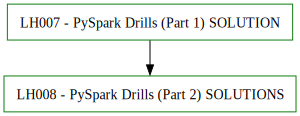

{'LH007 - PySpark Drills (Part 1) SOLUTION': {'exitVal': '',
  'exception': None},
 'LH008 - PySpark Drills (Part 2) SOLUTIONS': {'exitVal': '',
  'exception': None}}

In [10]:
nb.runMultiple(DAG, {"displayDAGViaGraphviz": True})